PREDICTING APARTMENT PRICE IN LAGOS STATE NIGERIA

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from ipywidgets import Dropdown, interact

In [2]:
# Reading the dataset
df2 = pd.read_csv('lagos-rent.csv')
df2.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,"3,500,000",1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London
3,2 Bedroom Apartment For Rent,2 BEDROOM HOUSE FOR RENT,"2,700,000",1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo
4,4 Bedroom Terrace Duplex For Rent,4 BEDROOM HOUSE FOR RENT,"4,000,000",1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron


In [3]:
# Dropping the unwanted columns
df2.drop(columns=['Title', 'More Info'], inplace=True)

In [4]:
# Removing the anomalies in the price column
df2['Price']= df2['Price'].str.replace(',', '')
df2.head()

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,5000000/year,0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi
1,5000000/year,0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki
2,3500000,1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London
3,2700000,1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo
4,4000000,1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron


In [5]:
# Removing the anomalies in the price column
df2['Price'] = df2['Price'].str.replace('/', '')
df2.head()

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,5000000year,0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi
1,5000000year,0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki
2,3500000,1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London
3,2700000,1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo
4,4000000,1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron


In [6]:
# Drop rows with no number of toilets in the 'Toilet' column
df2.drop(df2.index[(df2['Toilets']== '0 Toilets')], axis=0, inplace=True)
df2.drop(df2.index[(df2['Toilets']== ' Toilets')], axis=0, inplace=True)
# taking the numbers in df1[Toilets] column and changing the type
df2['Toilets'] = df2['Toilets'].str[0].astype(int)

In [7]:
df2['Toilets'].unique()

array([5, 3, 4, 7, 6, 2, 1, 8, 9])

In [8]:
# Drop rows with no number of Bathrooms in the 'Bathrooms' column
df2.drop(df2.index[(df2['Bathrooms']== '0 baths')], axis=0, inplace=True)
df2.drop(df2.index[(df2['Bathrooms']== ' baths')], axis=0, inplace=True)
# taking only the 'numbers' in df1[bathrooms] column and changing the type
df2['Bathrooms'] = df2['Bathrooms'].str[0].astype(int)

In [9]:
df2['Bathrooms'].unique()

array([4, 3, 5, 6, 2, 1, 7, 8, 9])

In [10]:
# Drop rows with no number of Bedrooms in the 'Bedrooms' column
df2.drop(df2.index[(df2['Bedrooms']== '0 beds')], axis=0, inplace=True)
df2.drop(df2.index[(df2['Bedrooms']== ' beds')], axis=0, inplace=True)
# Taking only the numbers in df1[bedrooms] column and changing the type
df2['Bedrooms'] = df2['Bedrooms'].str[0].astype(int)

In [11]:
df2['Bedrooms'].unique()

array([4, 2, 3, 5, 1, 6, 8, 9, 7])

In [12]:
# removing str attached to price in the price column
df2['Price'] = df2['Price'].apply(lambda x: str(x).replace('year', '') if 'year' in str(x) else(x))           
df2['Price'] = df2['Price'].apply(lambda x: str(x).replace('day', '') if 'day' in str(x) else(x))
df2['Price'] = df2['Price'].apply(lambda x: str(x).replace('month', '') if 'month' in str(x) else(x))
df2['Price'] = df2['Price'].apply(lambda x: str(x).replace('sqm', '') if 'sqm' in str(x) else(x))
# changing the price type from 'object' to 'int'
df2['Price']= df2['Price'].astype(dtype=np.int64)

In [13]:
# To check if changes are effected
df2.head()

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,5000000,0,1,0,4,4,5,Lekki,Agungi
1,5000000,0,1,0,4,4,5,Lekki,Other Lekki
2,3500000,1,0,0,2,3,3,Lekki,Osapa London
3,2700000,1,1,0,2,3,3,Lekki,Ologolo
4,4000000,1,0,0,4,5,5,Lekki,Chevron


In [14]:
# drop column with high cardinal categorical features
df2.drop(columns=['Neighborhood'], inplace=True)

In [15]:
# check if changes are effected
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41213 entries, 0 to 53069
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Price        41213 non-null  int64 
 1   Serviced     41213 non-null  int64 
 2   Newly Built  41213 non-null  int64 
 3   Furnished    41213 non-null  int64 
 4   Bedrooms     41213 non-null  int32 
 5   Bathrooms    41213 non-null  int32 
 6   Toilets      41213 non-null  int32 
 7   City         41213 non-null  object
dtypes: int32(3), int64(4), object(1)
memory usage: 2.4+ MB


In [16]:
# Removing outliers
mask= df2['Price'] >= 200000
df1 = df2[mask]
df1.head()


,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City
0,5000000,0,1,0,4,4,5,Lekki
1,5000000,0,1,0,4,4,5,Lekki
2,3500000,1,0,0,2,3,3,Lekki
3,2700000,1,1,0,2,3,3,Lekki
4,4000000,1,0,0,4,5,5,Lekki


In [17]:
# Removing outliers
mask = df1['Price'] <= 6000000
afford_apartment = df1[mask]
afford_apartment.head()

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City
0,5000000,0,1,0,4,4,5,Lekki
1,5000000,0,1,0,4,4,5,Lekki
2,3500000,1,0,0,2,3,3,Lekki
3,2700000,1,1,0,2,3,3,Lekki
4,4000000,1,0,0,4,5,5,Lekki


In [18]:
# check the number of unique variables in each column
afford_apartment.nunique()

Price          201
Serviced         2
Newly Built      2
Furnished        2
Bedrooms         9
Bathrooms        9
Toilets          9
City             9
dtype: int64

<AxesSubplot:>

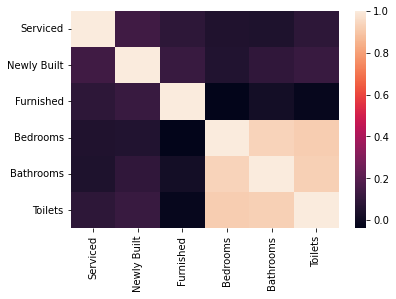

In [19]:
# check for multicollinearity
corr = afford_apartment.drop(columns='Price').corr()
sns.heatmap(corr)

In [20]:
# drop columns with multicollinearity
afford_apartment.drop(columns=['Bathrooms', 'Toilets'], inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14188\3665081716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afford_apartment.drop(columns=['Bathrooms', 'Toilets'], inplace = True)


In [21]:
# check the percentage of unique variables in the 'serviced' column. while 0 represent 'not serviced',1 represent 'serviced'
afford_apartment['Serviced'].value_counts(normalize=True).round(2)

0    0.8
1    0.2
Name: Serviced, dtype: float64

In [22]:
#check the percentage of unique variables in the 'Newly Built' column. while 0 represent 'not newly built',1 represent it's 'newly built'
afford_apartment['Newly Built'].value_counts(normalize=True).round(2)

0    0.67
1    0.33
Name: Newly Built, dtype: float64

In [23]:
# check the percentage of unique variables in the 'Furnished' column. while 0 represent 'not Furnished',1 represent 'it's Furnished
afford_apartment['Furnished'].value_counts(normalize=True).round(2)

0    0.86
1    0.14
Name: Furnished, dtype: float64

In [24]:
afford_apartment = afford_apartment.sort_values('Price')
afford_apartment.head()

,Price,Serviced,Newly Built,Furnished,Bedrooms,City
32851,200000,0,0,0,1,Ojodu
16326,200000,0,0,0,1,Lekki
46249,200000,0,0,0,1,Ajah
32973,200000,0,1,0,1,Ojodu
40964,200000,0,0,0,1,Surulere


In [25]:
# comparing price to city
apt_price_vs_city = afford_apartment.groupby('Price')['City'].value_counts(ascending=False)

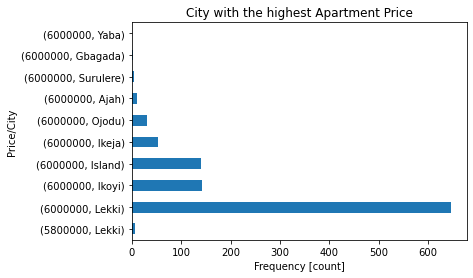

In [26]:
# plot cities with the highest price and thier frequency
apt_price_vs_city.tail(10).plot(kind='barh')
# label the axes
plt.xlabel('Frequency [count]')
plt.ylabel('Price/City')
# label the title
plt.title('City with the highest Apartment Price');

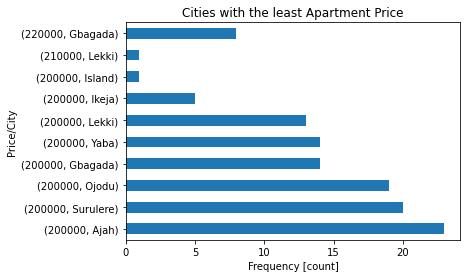

In [27]:
# plot cities with the lowest price and thier frequencies
apt_price_vs_city.head(10).plot(kind='barh')
# label the axes
plt.xlabel('Frequency [count]')
plt.ylabel('Price/City')
# label the title
plt.title('Cities with the least Apartment Price');

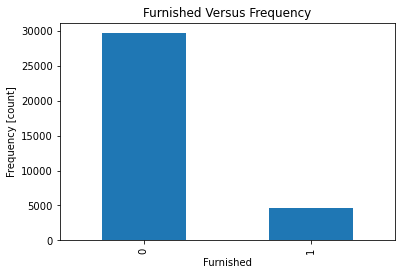

In [28]:
# chart showing the frequency of Furnished apartments. 0 represent not furnished, 1 represent furnished.
afford_apartment['Furnished'].value_counts().plot(kind='bar')
plt.xlabel('Furnished')
plt.ylabel('Frequency [count]')
plt.title('Furnished Versus Frequency');

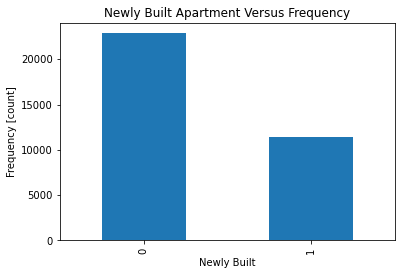

In [29]:
# chart showing the frequency of Newly Built apartments. 0 represent not Newly Built, 1 represent Newly Built.
afford_apartment['Newly Built'].value_counts().plot(kind='bar')
plt.xlabel('Newly Built')
plt.ylabel('Frequency [count]')
plt.title('Newly Built Apartment Versus Frequency');

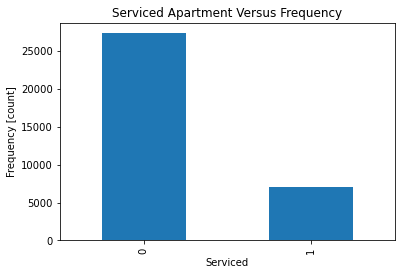

In [30]:
# chart showing the frequency of Serviced apartments. 0 represent not Serviced, 1 represent Serviced.
afford_apartment['Serviced'].value_counts().plot(kind='bar')
plt.xlabel('Serviced')
plt.ylabel('Frequency [count]')
plt.title('Serviced Apartment Versus Frequency');

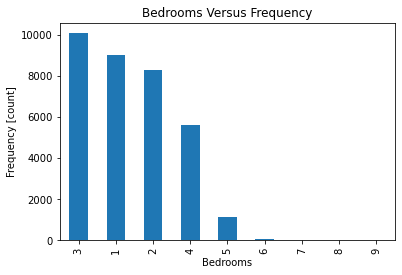

In [31]:
# chart showing the number of Bedrooms and their frequencies
afford_apartment['Bedrooms'].value_counts().plot(kind='bar')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency [count]')
plt.title('Bedrooms Versus Frequency');

In [32]:
# renaming the Newly Built column
afford_apartment.rename(columns={'Newly Built':'Newly_Built'}, inplace=True)

In [33]:
# getting the feature matrix and the target vector i.e the spliting into y_train and X_train
target = 'Price'
y_train = afford_apartment[target]
X_train = afford_apartment.drop(target, axis=1)

In [35]:
# spliting the dataset into train set and test set 
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [36]:
# Building the baseline model
y_mean = y_train.mean()
# iterating through the y_train
y_pred_baseline = [y_mean] * len(y_train)

In [37]:
# getting the Mean absolute error of the baseline model
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print('Mean apt price:', round(y_mean, 0))
print('Baseline MAE:', round(mae_baseline,0))

Mean apt price: 2101051.0
Baseline MAE: 1287690.0


In [38]:
# Building Model
model = make_pipeline(OneHotEncoder(), LinearRegression())
# fitting the model
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('linearregression', LinearRegression())])

In [39]:
# model prediction
y_pred_training = model.predict(X_train).round(0)
y_pred_training[:5]

array([ 204077., 1717912.,  941300.,  375356., 3154360.])

In [40]:
# getting the mean absolute error of the training model
mae_training = mean_absolute_error(y_train, y_pred_training)
print('Training MAE:', round(mae_training, 0))

Training MAE: 624657.0


In [41]:
# using our model to predict on test dataset
x_test= model.predict(X_test).round(0)
x_test[:5]

array([1623439., 3916064., 1575480., 1265413., 3120481.])

In [42]:
# getting the intercept and coefficient of our model
intercept = model.named_steps['linearregression'].intercept_
coefficient = model.named_steps['linearregression'].coef_

In [43]:
# getting the feature names
feature_names = model.named_steps['onehotencoder'].get_feature_names_out()

In [44]:
# getting the feature importance into a series
feat_importance = pd.Series(coefficient, index=feature_names)
feat_importance.head()

Serviced_0      -197953.617287
Serviced_1       197953.617301
Newly_Built_0    -47236.597149
Newly_Built_1     47236.597225
Furnished_0       40503.037137
dtype: float64

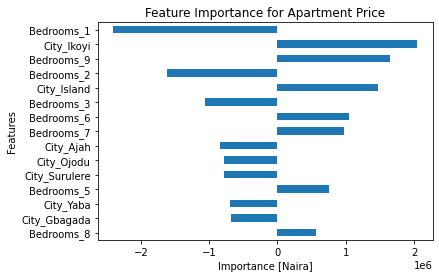

In [45]:
# plot chart of top 15 of our feature importance
feat_importance.sort_values(key=abs).tail(15).plot(kind='barh')
# label the axes
plt.xlabel('Importance [Naira]')
plt.ylabel('Features')
# label the title
plt.title('Feature Importance for Apartment Price');

In [46]:
# communicate our model using a function
def make_prediction(Serviced, Newly_Built, Furnished, Bedrooms, City):
    data = {'Serviced': Serviced, 'Newly_Built': Newly_Built, 'Furnished':Furnished, 'Bedrooms':Bedrooms, 'City':City}
    df= pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(0)[0]
    return f'Predicted apartment price: {prediction}'

In [50]:
# test our make_prediction function
make_prediction(Serviced=0, Newly_Built=0, Furnished=0, Bedrooms= 1, City='Ajah')

'Predicted apartment price: 237123.0'

In [47]:
# communicate using an interactive dashboard
interact(
    make_prediction,
    Serviced = Dropdown(options=sorted(X_train['Serviced'].unique())),
    Newly_Built = Dropdown(options=sorted(X_train['Newly_Built'].unique())),
    Furnished = Dropdown(options=sorted(X_train['Furnished'].unique())),
    Bedrooms = Dropdown(options=sorted(X_train['Bedrooms'].unique())),
    City = Dropdown(options=sorted(X_train['City'].unique())),
        
);

interactive(children=(Dropdown(description='Serviced', options=(0, 1), value=0), Dropdown(description='Newly_B…